In [83]:
# Libraries 

import numpy             as np
import matplotlib.pyplot as plt
from   scipy.stats       import norm
from   sklearn.mixture   import GaussianMixture

# LaTeX = ON!

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times New Roman"]
})

# Load Data

data = np.load( "formationchannels.npy" )

(10,)


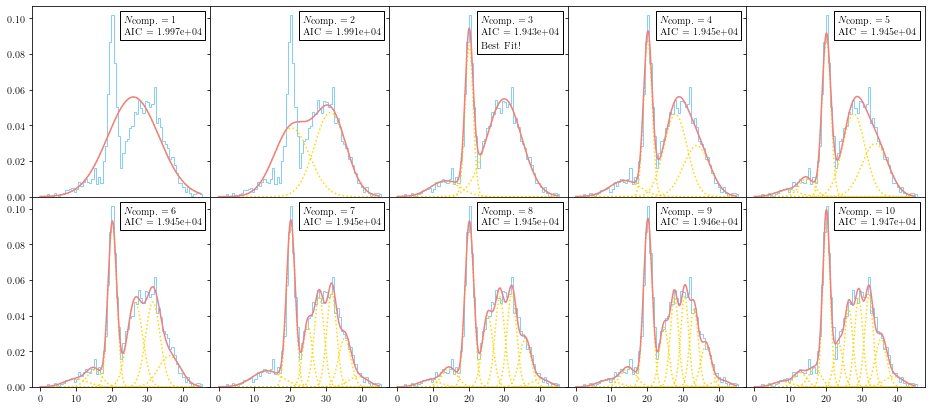

In [82]:
fig , ax = plt.subplots(2,5,figsize=(16,7))

ax = ax.reshape(10)

# collapse plots
fig.subplots_adjust(wspace=0.0,hspace=0.0)

# Histogram with data 

for j in range(10):
    
    counts, bins, _ = ax[j].hist(data, bins=70, density=True, color='lightskyblue', histtype='step')

# Prepare empty lists for stuff

GM , w , m , C , AIC = [] , [] , [] , [] , []

W , M , S = [[] for j in range(10)] , [[] for j in range(10)] , [[] for j in range(10)]

x = np.linspace(0, 45, 10000)

# With scikit-learn: Gaussian Mixtures with N = 1,2,...,10. 
# Each is done 25 times to (hopefully) not find a local maximum of the Likelihood

for j in range(10):
    
    GM.append( GaussianMixture(n_components=j+1, n_init=25).fit(data) )
    
    w = GM[j].weights_ 
    m = GM[j].means_ 
    C = GM[j].covariances_ 

    # append weight, mean, sigma for each gaussian component of the mixture, for all 10 mixtures:
    
    for i in range(j+1):
        
        W[j].append( w[i] )
        M[j].append( m[i][0] )
        S[j].append( C[i][0][0]**0.5 )

for j in range(10):
    
    # 2 different methods to compute the Likelihood: f and L
    
    lnL = GM[j].score_samples(x.reshape(-1,1))
    L   = np.exp( lnL )
    
    # ax[j].plot( x, L, color='gold')
    
    r   = GM[j].predict_proba(x.reshape(-1,1)) 
    I   = r * L[:,np.newaxis]
    
    f = np.zeros(10000)
    
    for i in range(j+1):
        
        f += W[j][i] * norm.pdf(x, loc=M[j][i], scale=S[j][i]) 

        # plot the individual components of the Mixtures:
        
        ax[j].plot( x, I[:,i], color='gold', ls=':')
        
    # method to evaluate fit goodness:
    
    aic = GM[j].aic(data)
    
    AIC.append(aic)
    
    a_label = r'$N_{\textup{comp.}} = \, $' + '{:d}'.format(j+1) + '\n' + 'AIC = {:.3e}'.format(aic)
    
    # finally plot the reconstructed best fit pdfs for each Gaussian Mixture
    
    ax[j].plot( x, f, color='lightcoral') #, label=a_label)
    ax[j].plot( x, f, ls='', marker='', label=a_label)
    
# find best Gaussian Mixture with the minimum of the AIC estimator, show it on the plots:

k = np.argmin(AIC)
ax[k].plot( x, f, ls='', marker='', label='Best Fit!')

for j in range(10):
    
    ax[j].legend(frameon=True, framealpha=1, fancybox=False, edgecolor='black', handlelength=0, handletextpad=0)


# for j in [0,1,2,3,4,6,7,8,9]:
for j in [1,2,3,4,6,7,8,9]:
    ax[j].tick_params(labelleft=False)
for j in range(5):
    ax[j].tick_params(axis='x', labelbottom=False)

fig.savefig('L06_Mixtura_Gausiana.pdf', bbox_inches='tight')

plt.show()

In [ ]:
fig , ax = plt.subplots(figsize=(6,6))

counts, bins, _   = ax.hist(data, bins=70, density=True, color='lightskyblue', histtype='step')

means_guesstimate = np.array([15,20,30])
means_guesstimate = means_guesstimate[:,np.newaxis]


NC = 3
GM = GaussianMixture(n_components=NC, means_init=means_guesstimate).fit(data)

w = GM.weights_
m = GM.means_
C = GM.covariances_

print(w.shape)
print(m.shape)
print(C.shape)

W = []
M = []
S = []

for i in range(NC):
    W.append( w[i] )
    M.append( m[i][0] )
    S.append( C[i][0][0]**0.5 )

x  = np.linspace(0, 45, 10000)
f  = np.zeros(10000)

for i in range(NC):
    f += W[i] * norm.pdf(x, loc=M[i], scale=S[i]) 
# f  = W[0] * norm.pdf(x, loc=M[0], scale=S[0]) 
# f += W[1] * norm.pdf(x, loc=M[1], scale=S[1]) 
# f += W[2] * norm.pdf(x, loc=M[2], scale=S[2])

ax.plot( x, f, color='lightcoral')


lnL = GM.score_samples(x.reshape(-1,1))
L   = np.exp( lnL )

# ax.plot( x, L, color='gold')

r   = GM.predict_proba(x.reshape(-1,1)) 

print(r.shape)

I   = r * L[:,np.newaxis]

# ax.plot( x, r, color='gold')
linestyles = ['--','-.',':']
for i in range(NC):
    # ax.plot( x, r[:,i], color='gold', ls=linestyles[i])   
    ax.plot( x, I[:,i], color='gold', ls=linestyles[i])
# dato un num estratto da L (la pdf ricostruita), la prob che venga da gaussiana 0 è r[:,0] 

plt.show()

# 3 gaussians?